In [3]:
import numpy, scipy, matplotlib.pyplot as plt, pandas as pd
import sklearn, IPython.display as ipd
import librosa, librosa.display

from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from pathlib import Path
%matplotlib inline

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [4]:
c1_signals = []
counter=0
for p in Path().glob('audio/train/c1/*.mp3'):
    counter=counter+1
    if counter > 10:
        break
    else:
        c1_signals.append(librosa.load(p, duration=30, offset=10)[0])
        
c2_signals = []
counter=0
for p in Path().glob('audio/train/c2/*.mp3'):
    counter=counter+1
    if counter > 10:
        break
    else:
        c2_signals.append(librosa.load(p, duration=30, offset=10)[0])

In [10]:
def extract_features(x):
    zcr = librosa.zero_crossings(x).sum()
    energy = scipy.linalg.norm(x)
    return [zcr, energy]

In [11]:
c1_features = numpy.array([extract_features(x) for x in c1_signals])
c2_features = numpy.array([extract_features(x) for x in c2_signals])

/home/kameswar/anaconda3/lib/python3.6/site-packages/librosa/core/audio.py:574: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.pad((y_sign[slice_post] != y_sign[slice_pre]),


In [13]:
features = numpy.vstack((c1_features, c2_features))

In [15]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
features_scaled = min_max_scaler.fit_transform(features)
print (features_scaled.shape)
print (features_scaled.min(axis=0))
print (features_scaled.max(axis=0))

(20, 2)
[-1. -1.]
[1. 1.]


Text(0,0.5,'Spectral Centroid (scaled)')

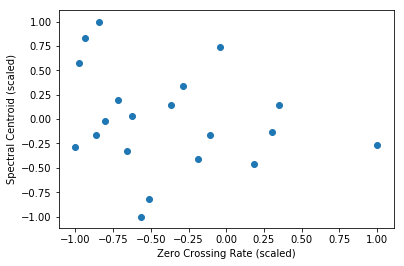

In [16]:
plt.scatter(features_scaled[:,0], features_scaled[:,1])
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Spectral Centroid (scaled)')

In [17]:
model = sklearn.cluster.KMeans(n_clusters=2)
labels = model.fit_predict(features_scaled)
print (labels)

[0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1]


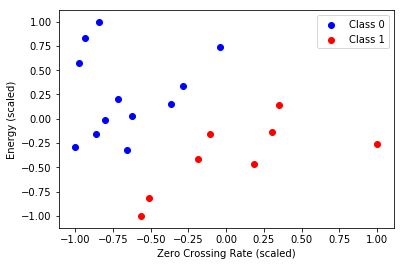

In [18]:
plt.scatter(features_scaled[labels==0,0], features_scaled[labels==0,1], c='b')
plt.scatter(features_scaled[labels==1,0], features_scaled[labels==1,1], c='r')
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Energy (scaled)')
plt.legend(('Class 0', 'Class 1'))

In [19]:
model = sklearn.cluster.AffinityPropagation()
labels = model.fit_predict(features_scaled)
print (labels)

[0 0 0 1 3 4 1 3 0 4 1 2 3 1 0 0 1 4 2 2]


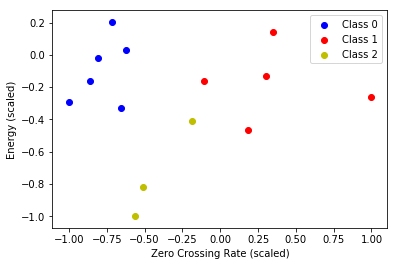

In [20]:
plt.scatter(features_scaled[labels==0,0], features_scaled[labels==0,1], c='b')
plt.scatter(features_scaled[labels==1,0], features_scaled[labels==1,1], c='r')
plt.scatter(features_scaled[labels==2,0], features_scaled[labels==2,1], c='y')
plt.xlabel('Zero Crossing Rate (scaled)')
plt.ylabel('Energy (scaled)')
plt.legend(('Class 0', 'Class 1', 'Class 2'))
